In [16]:
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch
from tqdm import tqdm

In [17]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("running on the GPU")
else:
    device = torch.device("cpu")
    print("running on the CPU")

running on the CPU


In [54]:
training_data_fasttext = np.load("custom_training.npy", allow_pickle=True)
DIMENSION = 100

In [55]:
print(len(training_data_fasttext))
HIDDEN_LAYER_DIM = 64 #256

2270482


In [56]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(DIMENSION, HIDDEN_LAYER_DIM)
        self.fc2 = nn.Linear(HIDDEN_LAYER_DIM, HIDDEN_LAYER_DIM)
        self.fc3 = nn.Linear(HIDDEN_LAYER_DIM, HIDDEN_LAYER_DIM)
        self.fc4 = nn.Linear(HIDDEN_LAYER_DIM, HIDDEN_LAYER_DIM)
        self.fc5 = nn.Linear(HIDDEN_LAYER_DIM, 2)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return F.softmax(x, dim=1)

In [57]:
tr_size = round(len(training_data_fasttext)*0.8)
tr_set = training_data_fasttext[:tr_size]
te_set = training_data_fasttext[tr_size:]

In [58]:
net = Net().to(device)
print(net)

Net(
  (fc1): Linear(in_features=100, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=64, bias=True)
  (fc5): Linear(in_features=64, out_features=2, bias=True)
)


In [59]:
def test(net):
    correct = 0
    total = 0
    with torch.no_grad():
        for i in tqdm(range(0, len(te_set), BATCH_SIZE)):
            batch_X = [x for x, y_ in te_set[i:i+BATCH_SIZE]]
            batch_y = [y_ for x, y_ in te_set[i:i+BATCH_SIZE]]

            tensor_batch_X = torch.tensor(batch_X).float().view(-1, DIMENSION).to(device)
            tensor_batch_y = torch.tensor(batch_y).float().to(device)
            batch_out = net(tensor_batch_X)

            out_maxes = [torch.argmax(val) for val in batch_out]
            target_maxes = [torch.argmax(val) for val in tensor_batch_y]
            
            for i, j in zip(out_maxes, target_maxes):
                if i == j:
                    correct +=1
                total += 1
    return round(correct/total, 3)

In [60]:
BATCH_SIZE = 64
EPOCHS = 20
def train(net):
    loss_function = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=0.001)
    loss = 1000000000
    test_accuracy_at_each_epoch = []
    for epoch in range(EPOCHS):
        for i in tqdm(range(0, len(tr_set), BATCH_SIZE)):
            batch_X = np.array([x for x, y_ in tr_set[i:i+BATCH_SIZE]])
            batch_y = np.array([y_ for x, y_ in tr_set[i:i+BATCH_SIZE]])

            tensor_batch_X = torch.tensor(batch_X).float()
            tensor_batch_y = torch.tensor(batch_y).float()

            tensor_batch_X, tensor_batch_y = tensor_batch_X.to(device), tensor_batch_y.to(device)

            net.zero_grad()

            output = net(tensor_batch_X.view(-1, DIMENSION))
            loss = loss_function(output, tensor_batch_y)
            loss.backward()
            optimizer.step()
      
        accuracy = test(net)
        test_accuracy_at_each_epoch.append(accuracy)
        print(f"\nLoss: {loss}")
        print(f"\nAccuracy: {accuracy}")
    return test_accuracy_at_each_epoch

In [61]:
test_accuracy_epoch = train(net)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7096/7096 [00:40<00:00, 174.57it/s]



Loss: 0.13174974918365479

Accuracy: 0.793


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7096/7096 [00:29<00:00, 242.09it/s]



Loss: 0.13671818375587463

Accuracy: 0.797


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7096/7096 [00:29<00:00, 241.68it/s]



Loss: 0.10446420311927795

Accuracy: 0.797


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7096/7096 [00:32<00:00, 216.55it/s]



Loss: 0.10891442000865936

Accuracy: 0.798


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7096/7096 [00:29<00:00, 238.23it/s]



Loss: 0.10537593811750412

Accuracy: 0.799


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7096/7096 [00:28<00:00, 251.49it/s]



Loss: 0.09942572563886642

Accuracy: 0.799


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7096/7096 [00:28<00:00, 247.20it/s]



Loss: 0.11187876760959625

Accuracy: 0.799


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7096/7096 [00:30<00:00, 229.88it/s]



Loss: 0.0808480978012085

Accuracy: 0.799


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7096/7096 [00:28<00:00, 252.16it/s]



Loss: 0.08971799910068512

Accuracy: 0.799


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7096/7096 [00:31<00:00, 225.71it/s]



Loss: 0.08593708276748657

Accuracy: 0.799


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7096/7096 [00:28<00:00, 247.40it/s]



Loss: 0.11402089893817902

Accuracy: 0.799


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7096/7096 [00:25<00:00, 277.36it/s]



Loss: 0.10443475097417831

Accuracy: 0.799


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7096/7096 [00:26<00:00, 272.13it/s]



Loss: 0.09816458821296692

Accuracy: 0.8


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7096/7096 [00:25<00:00, 274.81it/s]



Loss: 0.10045620799064636

Accuracy: 0.8


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7096/7096 [00:27<00:00, 258.41it/s]



Loss: 0.09697763621807098

Accuracy: 0.799


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7096/7096 [00:25<00:00, 276.89it/s]



Loss: 0.10879147052764893

Accuracy: 0.799


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7096/7096 [00:26<00:00, 269.60it/s]



Loss: 0.10146137326955795

Accuracy: 0.8


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7096/7096 [00:25<00:00, 278.62it/s]



Loss: 0.10641039907932281

Accuracy: 0.8


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7096/7096 [00:25<00:00, 280.05it/s]



Loss: 0.10742238909006119

Accuracy: 0.8


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7096/7096 [00:24<00:00, 285.67it/s]


Loss: 0.10642841458320618

Accuracy: 0.8


In [62]:
print(test_accuracy_epoch)

[0.793, 0.797, 0.797, 0.798, 0.799, 0.799, 0.799, 0.799, 0.799, 0.799, 0.799, 0.799, 0.8, 0.8, 0.799, 0.799, 0.8, 0.8, 0.8, 0.8]


In [63]:
import matplotlib.pyplot as plt

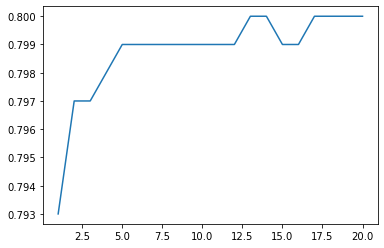

In [64]:
plt.plot(list(range(1,EPOCHS+1)), test_accuracy_epoch)
plt.show()